# Import Data

In [811]:
import pandas as pd
#https://archive.ics.uci.edu/ml/datasets/Heart+Disease


data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 
data=data.rename(columns={'age':'age','sex':'sex','cp':'chest_pain_type','trestbps':'blood_pressure','chol':'cholestoral','fbs':'fasting_blood_sugar','restecg':'electrocardiographic','thalach':'maximum_heart_rate','exang':'angina',
                       'oldpeak':'st_depression','slope':'st_slope','ca':'vessel_flouroscopy','thal':'thal','num':'outcome'})

# Distribution of Target

<BarContainer object of 5 artists>

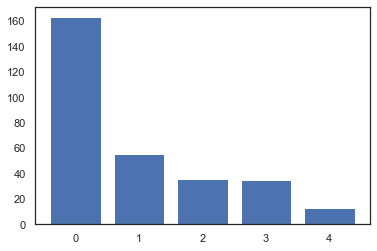

In [812]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4]
y = data.outcome.value_counts()

plt.bar(x,y)

Since we're simply trying to predict the presence of heart attacks, it seems reasonable to combine outcomes 1-4 into a single class that we'll call 1.

<AxesSubplot:>

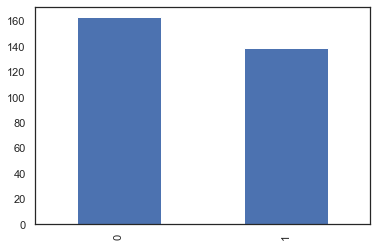

In [813]:
data.outcome=data.outcome.replace(2,1).replace(3,1).replace(4,1)
data['outcome'].value_counts().plot.bar()

The data sets are sufficiently balanced that I don't need to oversample.

# Clean Data

Let's look for missing data in the categorical columns.

In [814]:
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'electrocardiographic', 'angina', 'st_slope', 'vessel_flouroscopy', 'thal']

for column in categorical_columns:# 
    print('Name: ', column, ',', 'categories: ',data[column].unique())

Name:  sex , categories:  [1 0]
Name:  chest_pain_type , categories:  [4 3 2 1]
Name:  fasting_blood_sugar , categories:  [0 1]
Name:  electrocardiographic , categories:  [2 0 1]
Name:  angina , categories:  [1 0]
Name:  st_slope , categories:  [2 3 1]
Name:  vessel_flouroscopy , categories:  ['3' '2' '0' '1' '?']
Name:  thal , categories:  ['3' '7' '6' '?']


Let's look at the missing data

In [815]:
data[(data.vessel_flouroscopy == '?') | (data.thal == '?')]

,age,sex,chest_pain_type,blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate,angina,st_depression,st_slope,vessel_flouroscopy,thal,outcome
86,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
165,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
191,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
265,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
286,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
301,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


Since there are only 6 examples, I think it's safe to drop them all

In [816]:
drop_index = data[(data.vessel_flouroscopy == '?') | (data.thal == '?')].index

data = data.drop(drop_index).reset_index()

In [817]:
continuous_columns=['age','blood_pressure','cholestoral','maximum_heart_rate','st_depression','outcome']
for colname in continuous_columns:
    data[colname]=data[colname].astype('float')

# One Hot

First we'll turn them into strings, then we'll get the dummies. First we need the categorical columns that require encoding.

In [818]:
categorical_columns_mult = ['chest_pain_type', 'fasting_blood_sugar', 'electrocardiographic', 'angina', 'st_slope', 'vessel_flouroscopy', 'thal']

In [819]:
for colname in categorical_columns:
    data[colname] = data[colname].astype('str')
data = pd.get_dummies(data, columns = categorical_columns)

Now let's rename the columns according to the information we're given:

In [820]:
data = data.rename(columns = {'sex_0':'female','sex_1':'male', 'chest_pain_type_1':'typical_angina','chest_pain_type_2':'atpical_angina','chest_pain_type_3':'non_angina_pain', 'chest_pain_type_4':'asymptomatic_pain',
                       'fasting_blood_sugar_0':'sugar_false', 'fasting_blood_sugar_1':'sugar_true','electrocardiographic_0':'ecg_normal',	'electrocardiographic_1':'ecg_abnormality','electrocardiographic_2':'ecg_hypertrophy',
                       'angina_0':'exercize_angina_true', 'angina_1':'exercize_angina_false', 'st_slope_1':'st_upslope','st_slope_2':'st_flat', 'st_slope_3':'st_downslope','vessel_flouroscopy_0':'no_vessel',	'vessel_flouroscopy_1':'one_vessel','vessel_flouroscopy_2':'two_vessel','vessel_flouroscopy_3':'three_vessel',
                       'thal_3':'thal_normal','thal_6':'thal_fixed_defect',	'thal_7':'thal_reversable'}).drop(columns='index')

# Visualising Continuous Variables

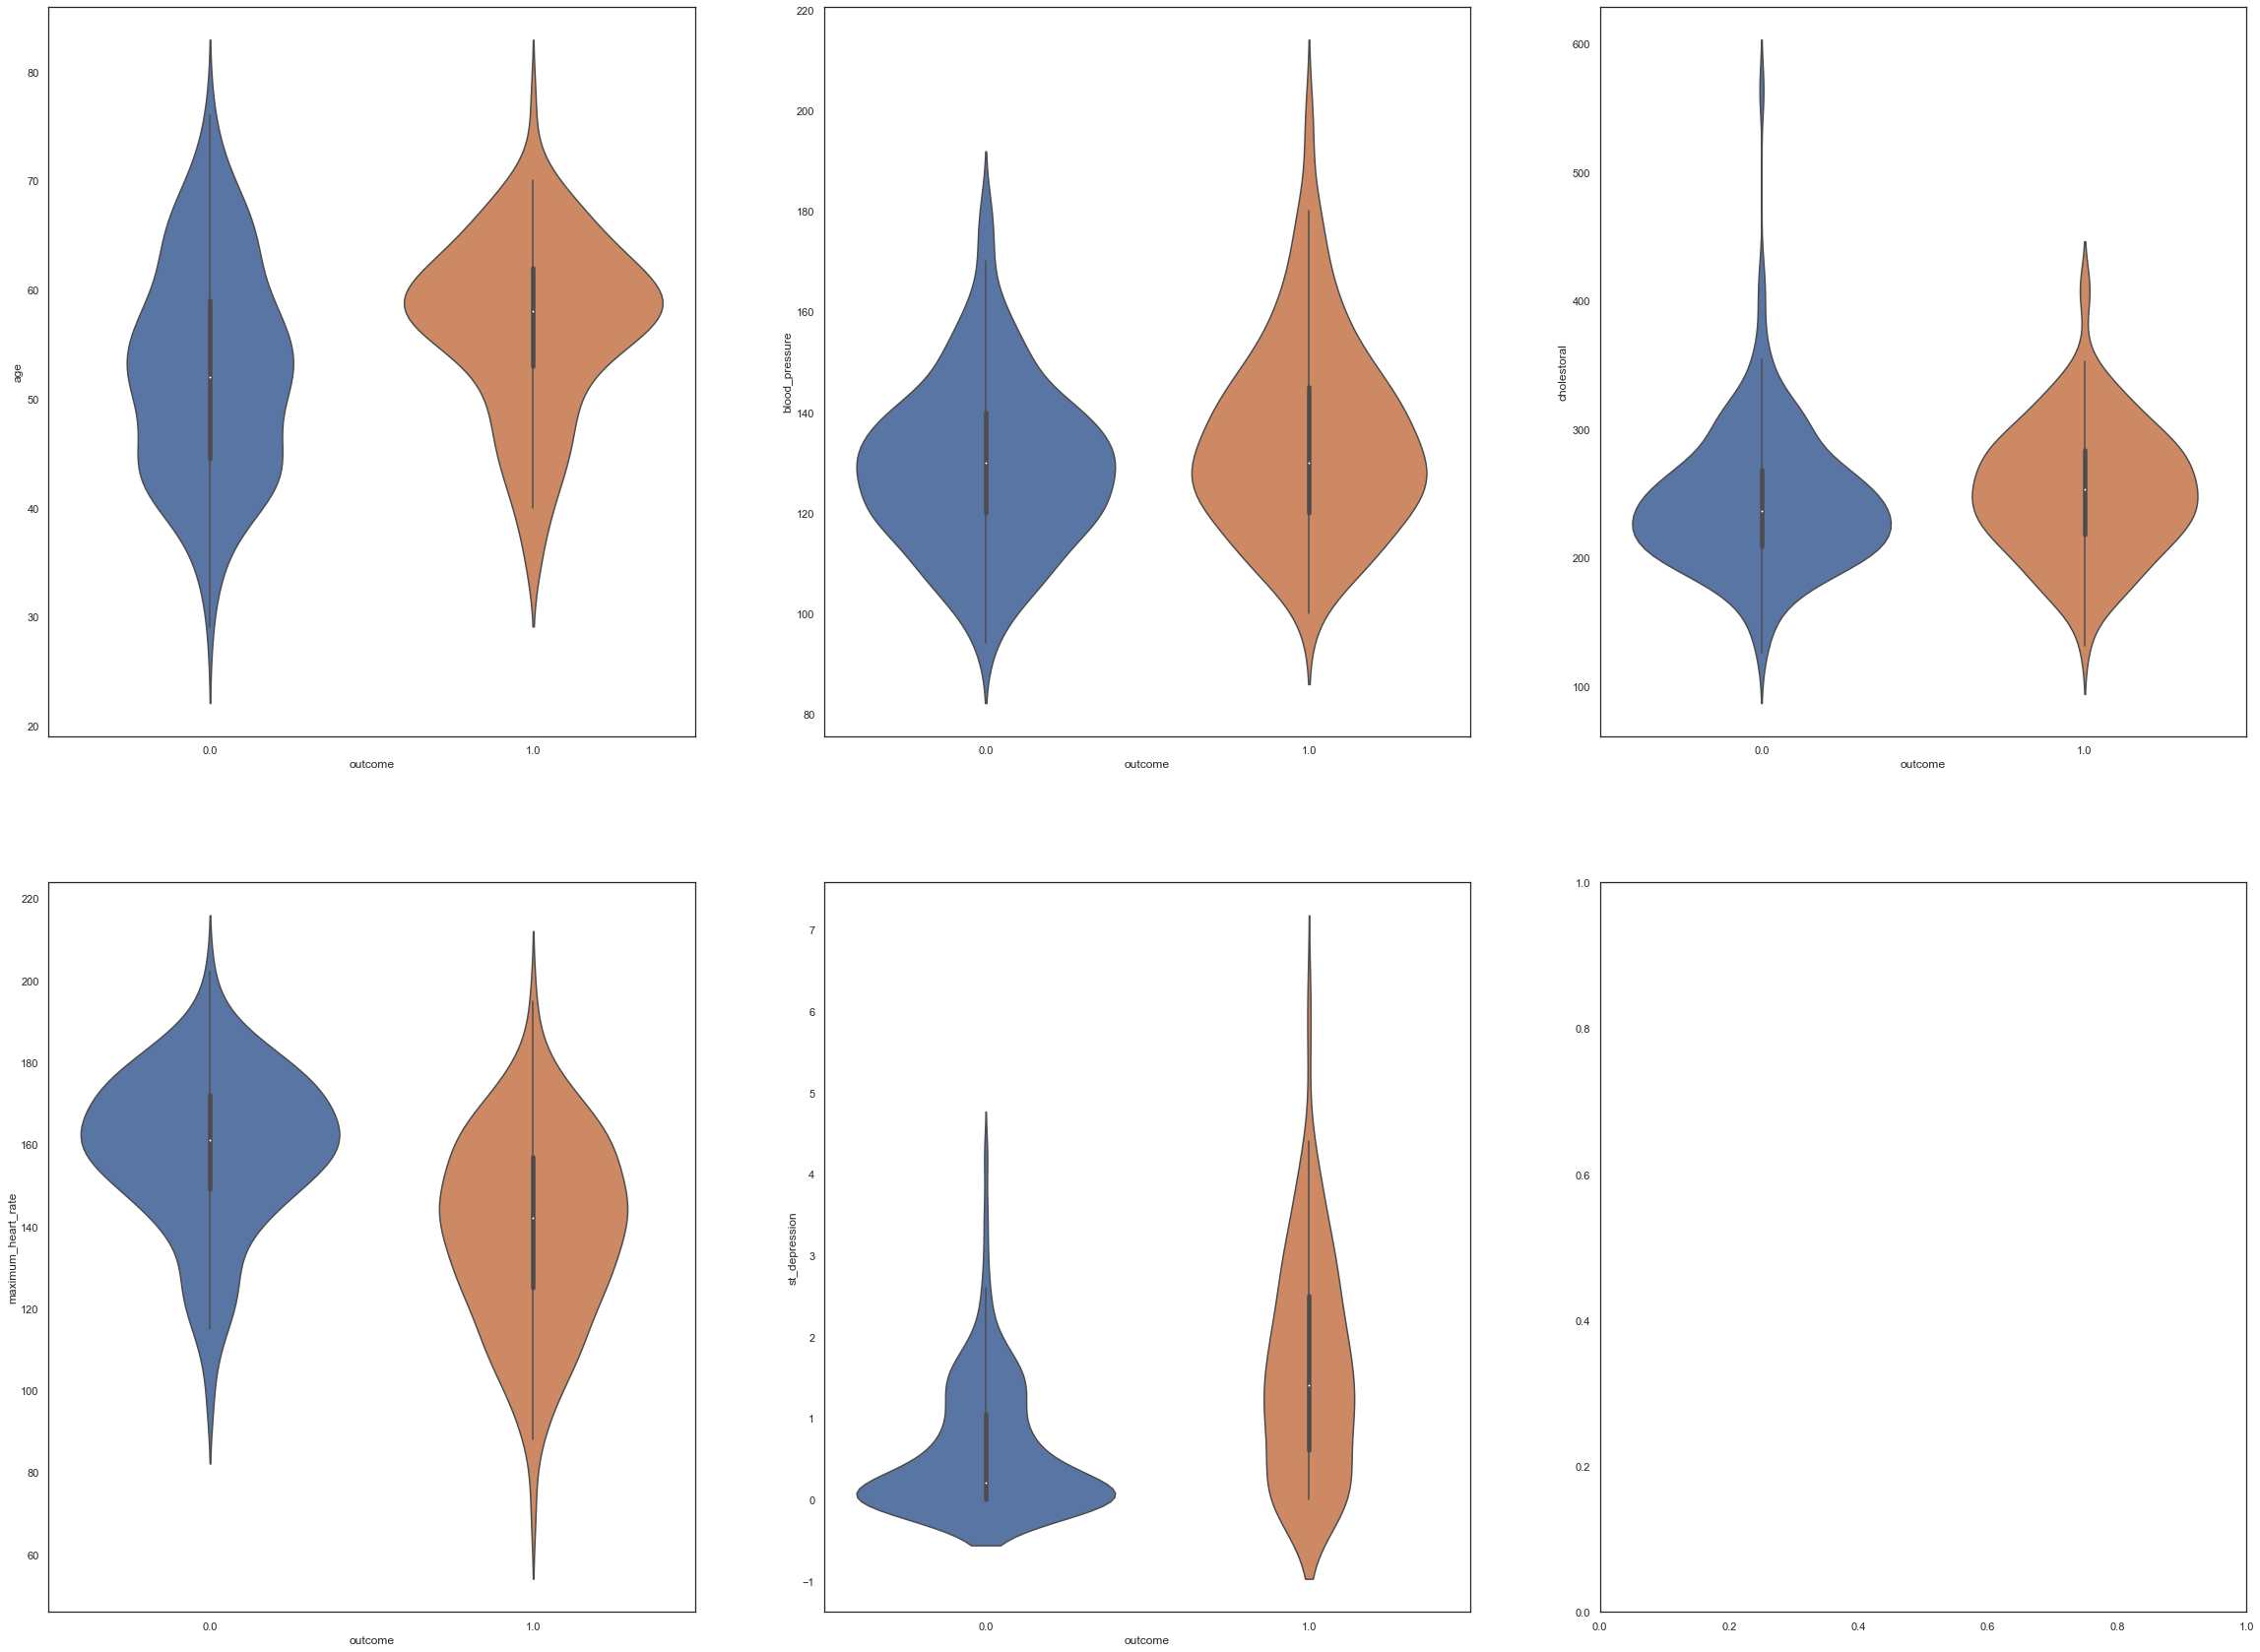

In [821]:
continuous_features=['age','blood_pressure','cholestoral','maximum_heart_rate','st_depression']
fig, axes = plt.subplots(2, 3, figsize=(40,30))
#fig.suptitle('Visualising Continuous Variables')
axes=axes.ravel()

for i,colname in enumerate(continuous_features):
    sns.violinplot(ax=axes[i],x="outcome", y=colname, data=data)
    #axes[i].set_ylim([0, len(data[colname])])

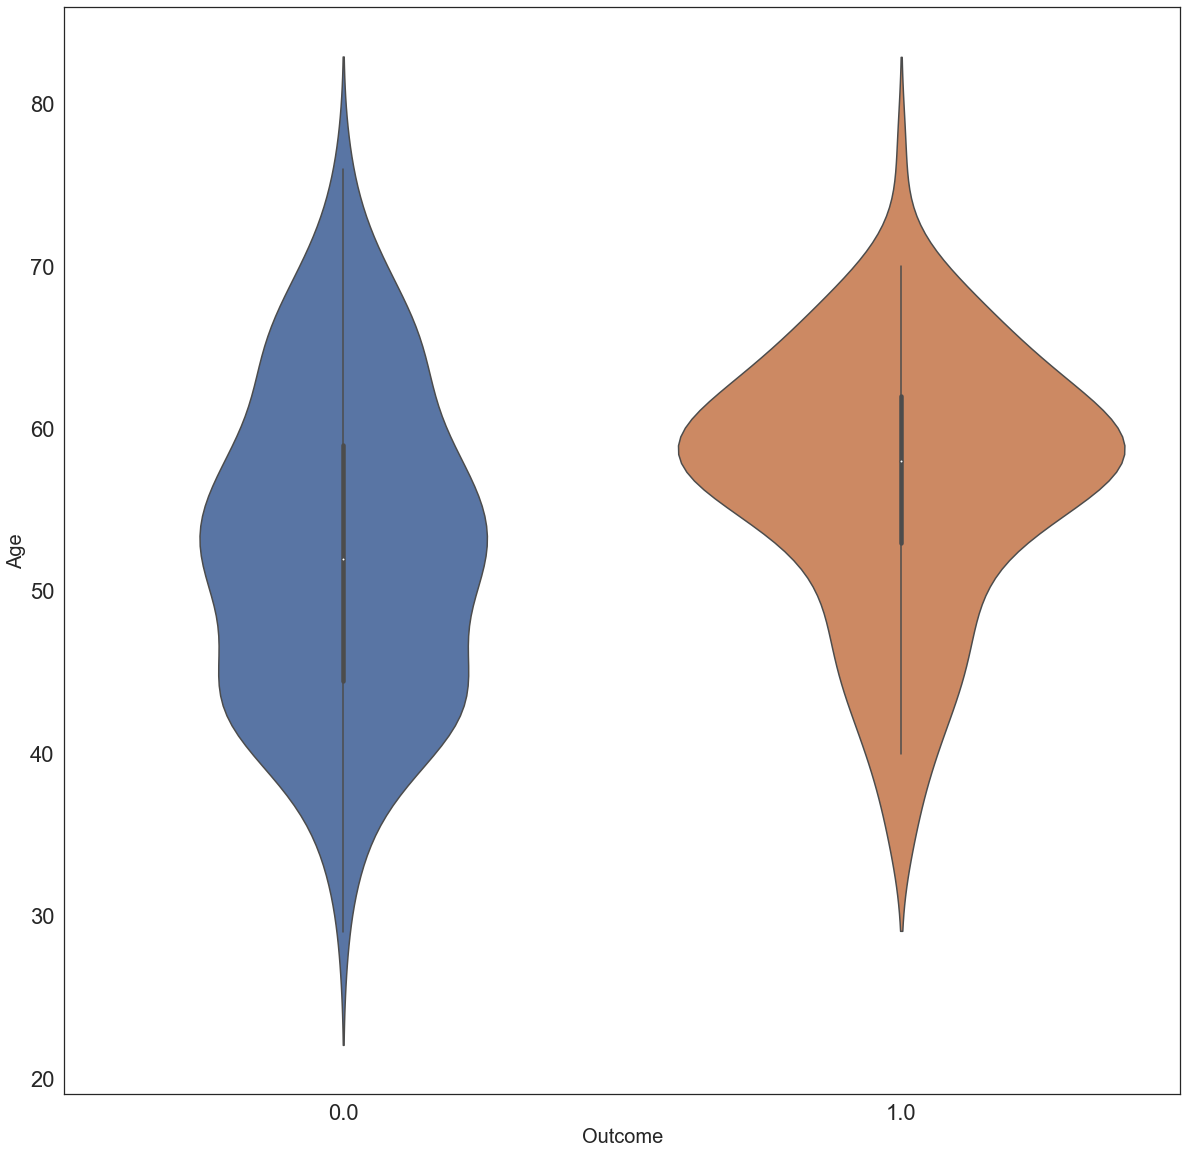

In [822]:
fig = plt.figure(figsize=(20,20))
sns.violinplot(x="outcome", y='age', data=data)
plt.xlabel('Outcome',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.savefig('age')

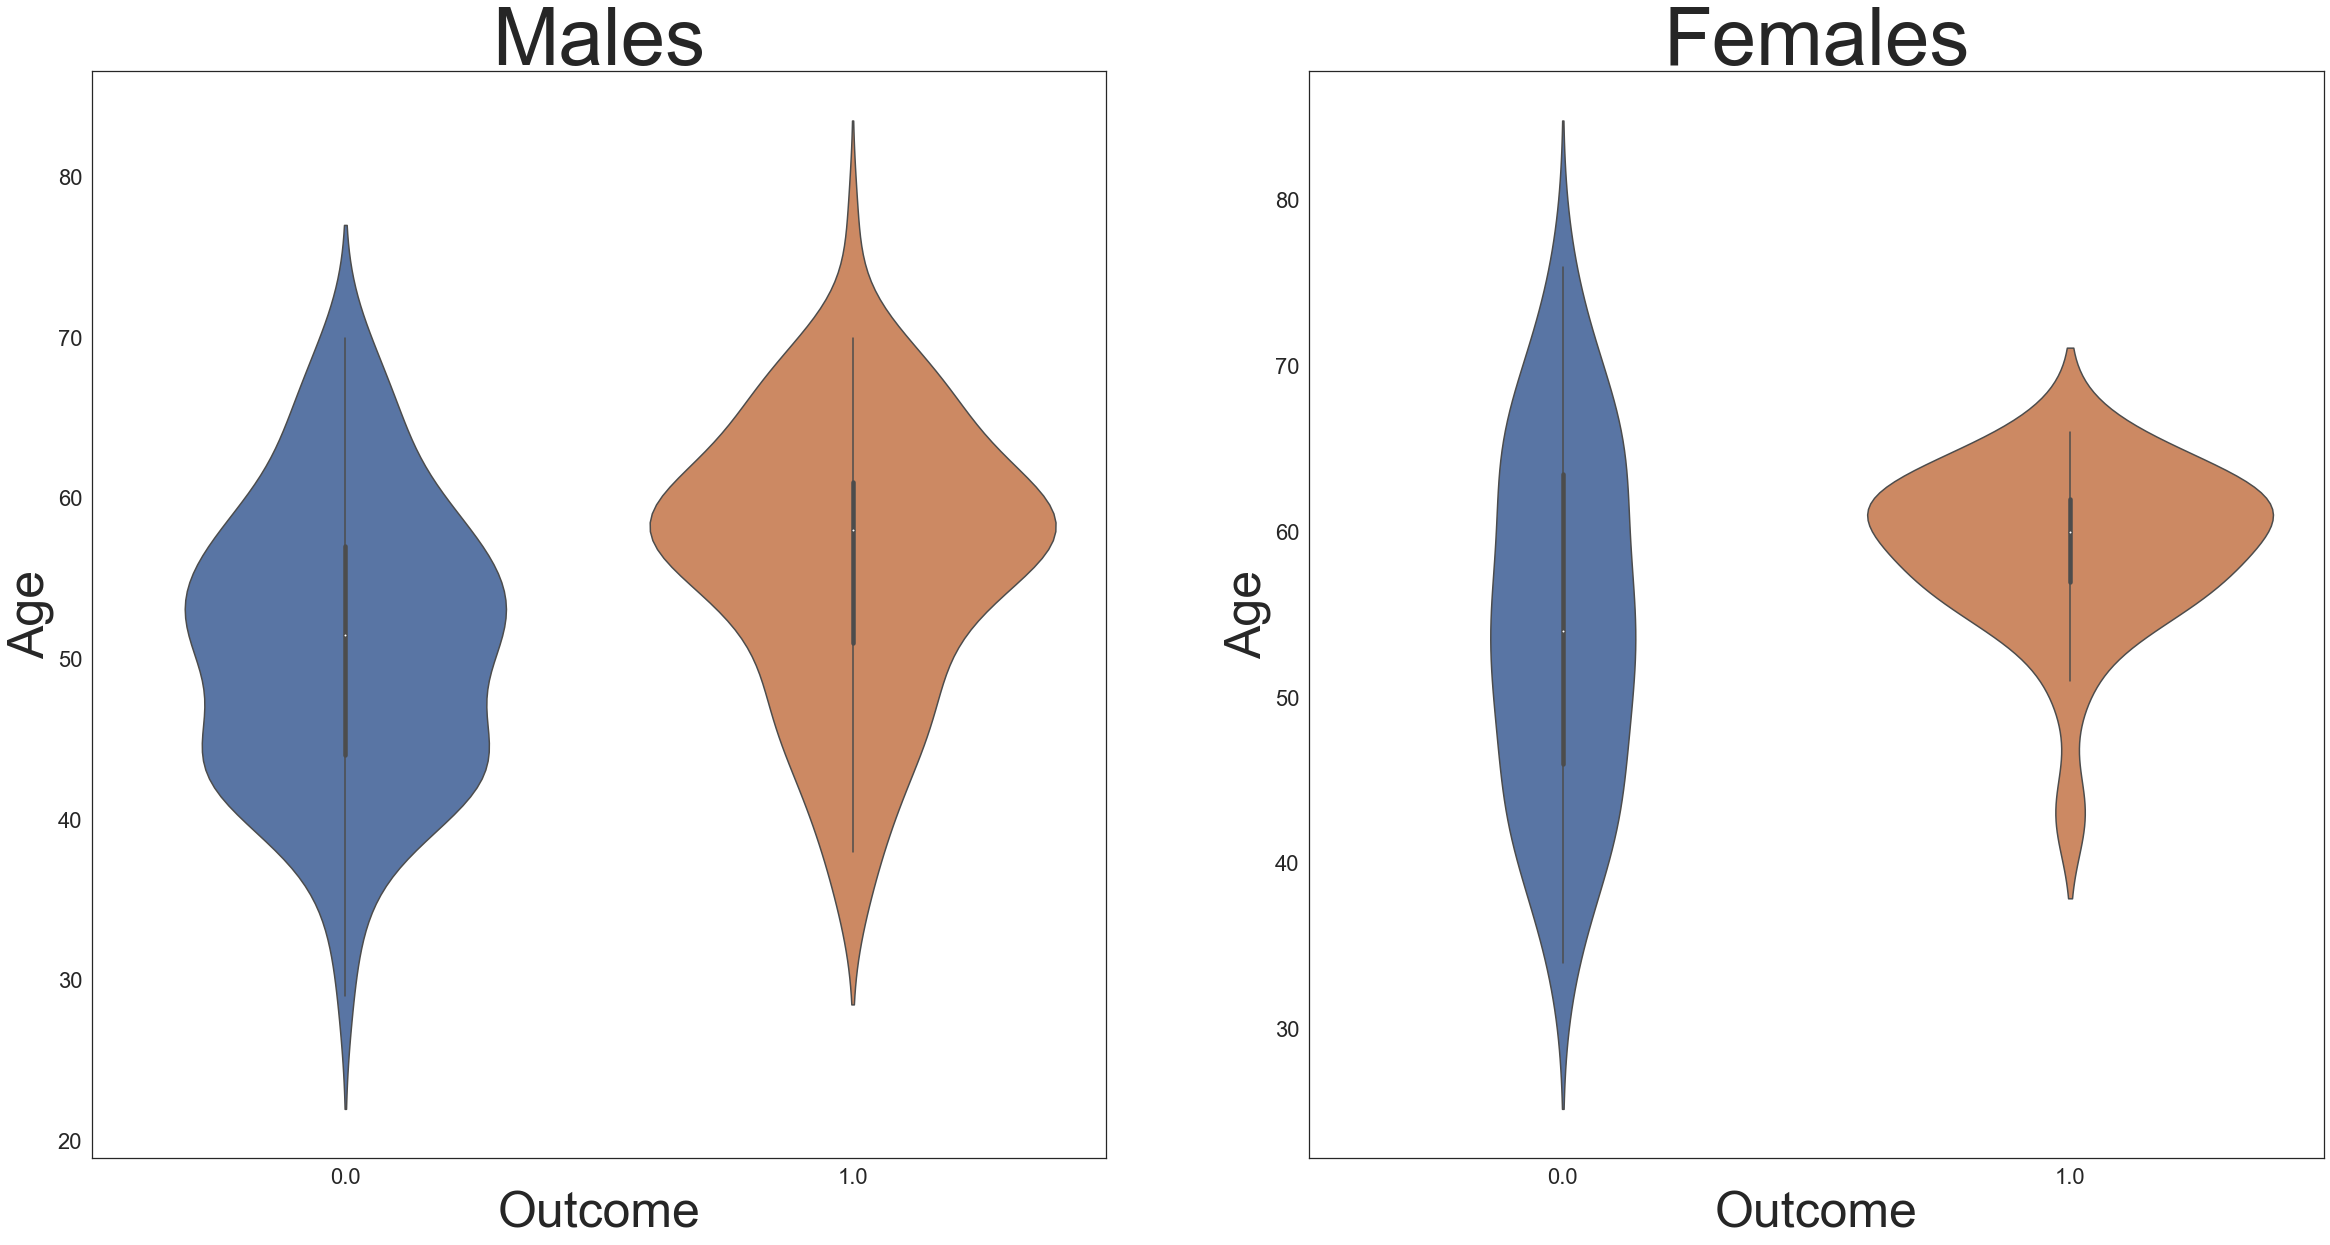

In [823]:
fig, axes = plt.subplots(1, 2, figsize=(40,20))
#fig.suptitle('Visualising Continuous Variables')
axes=axes.ravel()

plt.xlabel('Outcome',fontsize=20)

sns.violinplot(ax=axes[0],x="outcome", y='age', data=data[data['male']==1])
axes[0].set_xlabel('Outcome',fontsize=50)
axes[0].set_ylabel('Age',fontsize=50)
axes[0].tick_params(axis='both', which='major', labelsize=22)
axes[0].set_title('Males', fontsize=80)

sns.violinplot(ax=axes[1],x="outcome", y='age', data=data[data['female']==1])
axes[1].set_xlabel('Outcome',fontsize=50)
axes[1].set_ylabel('Age',fontsize=50)
axes[1].tick_params(axis='both', which='major', labelsize=22)
axes[1].set_title('Females', fontsize=80)

plt.savefig('age_mf')

# Visualising Boolean Columns

In [824]:
def plot_graphs(data,categorical_columns):
    
    fig = plt.figure(figsize=(5,5))
       
    plt.bar(categorical_columns,[data[data[colname]==1].outcome.mean() for colname in categorical_columns])
    plt.show()


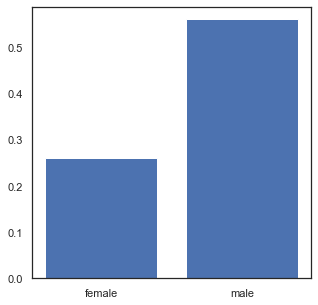

In [825]:
plot_graphs(data,['female','male'])

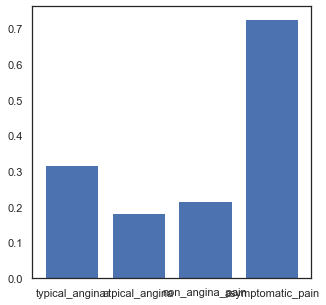

In [826]:
plot_graphs(data,['typical_angina', 'atpical_angina','non_angina_pain', 'asymptomatic_pain'])

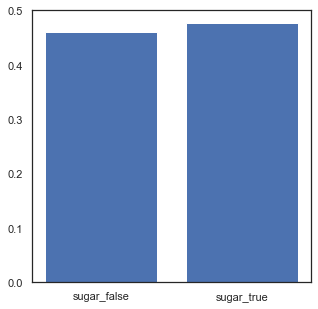

In [827]:
plot_graphs(data,['sugar_false', 'sugar_true'])


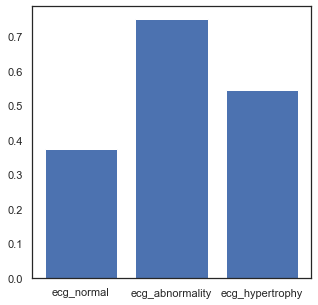

In [828]:
plot_graphs(data,['ecg_normal', 'ecg_abnormality', 'ecg_hypertrophy'])

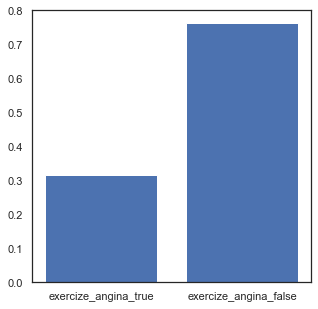

In [829]:
plot_graphs(data,['exercize_angina_true', 'exercize_angina_false'])

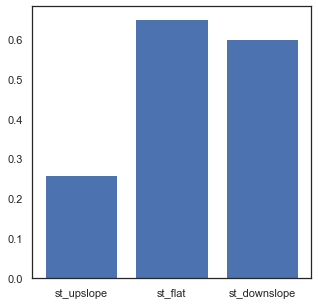

In [830]:
plot_graphs(data,['st_upslope','st_flat', 'st_downslope'])


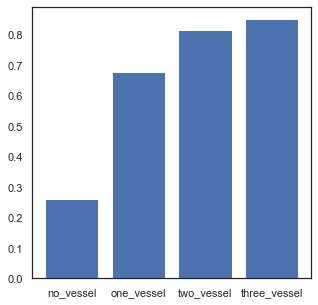

In [831]:
plot_graphs(data,['no_vessel', 'one_vessel', 'two_vessel','three_vessel'])

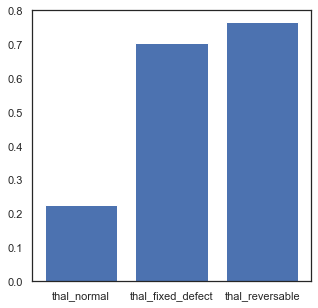

In [832]:
plot_graphs(data,['thal_normal', 'thal_fixed_defect', 'thal_reversable'])

# First Model - all features

In [833]:
X=data.drop(columns=['outcome'])
y=data['outcome']

In [834]:
from sklearn.preprocessing import MaxAbsScaler

scaler=MaxAbsScaler()
X_scaled=scaler.fit_transform(X)

In [835]:
import warnings
warnings.filterwarnings("ignore")

# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier



def train_models(X,y):

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', penalty='l1',max_iter=100,C=1,class_weight='balanced')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('SGD', SGDClassifier()) )
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('RF', RandomForestClassifier()))


    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    #boxplot algorithm comparison
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()
    
    return models

LR: 0.847586 (0.057868)
LDA: 0.864483 (0.048900)
KNN: 0.841149 (0.070918)
CART: 0.715977 (0.070757)
NB: 0.820575 (0.075414)
SVM: 0.844138 (0.053813)
SGD: 0.767011 (0.090367)
ADA: 0.809770 (0.088408)
RF: 0.830460 (0.087928)


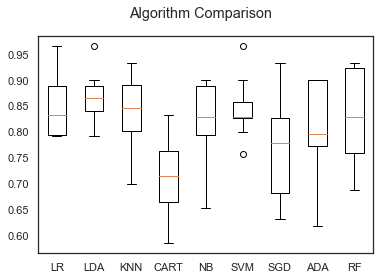

In [836]:
models=train_models(X_scaled,y)

# Model 2 - Feature Importance

In [837]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def feature_importance(X,y,colnames,importance_thresh):
    
    lr = LogisticRegression()
    lr.fit(X,y)
    coefficients = lr.coef_

    fi=pd.Series(coefficients[0],index=colnames)
    plt.figure(figsize=(15,15))
    fi.plot.barh()
    
    print(fi[abs(fi)>importance_thresh].index)
    return fi[abs(fi)>importance_thresh].index, fi[abs(fi)>importance_thresh]

Index(['age', 'blood_pressure', 'cholestoral', 'maximum_heart_rate',
       'st_depression', 'female', 'male', 'typical_angina', 'non_angina_pain',
       'asymptomatic_pain', 'sugar_false', 'sugar_true', 'ecg_normal',
       'ecg_abnormality', 'ecg_hypertrophy', 'exercize_angina_true',
       'exercize_angina_false', 'st_upslope', 'st_flat', 'st_downslope',
       'no_vessel', 'one_vessel', 'two_vessel', 'three_vessel', 'thal_normal',
       'thal_fixed_defect', 'thal_reversable'],
      dtype='object')


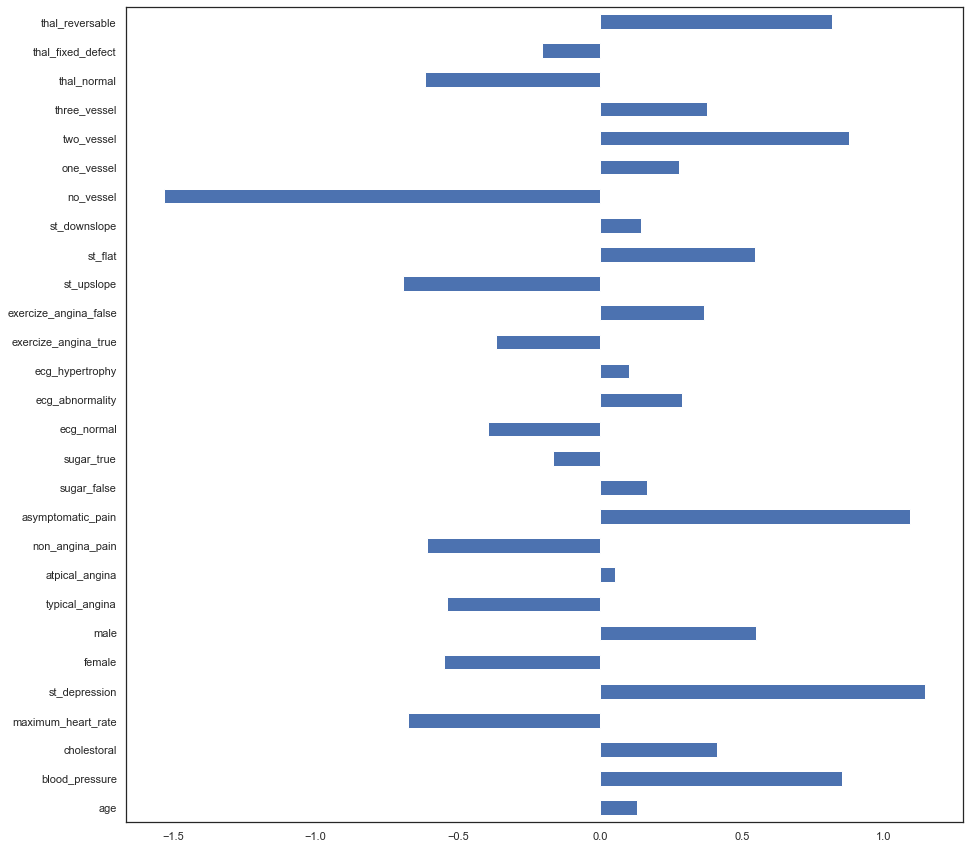

In [838]:
important_features=feature_importance(X_scaled,y,X.columns,0.1)

In [839]:
selected_features=['thal_reversable','no_vessel','st_flat','exercize_angina_true','ecg_normal','sugar_true','asymptomatic_pain','male','st_depression','maximum_heart_rate','cholestoral','blood_pressure','age']

In [840]:
X=X[selected_features]

In [841]:
from sklearn.preprocessing import MaxAbsScaler

scaler=MaxAbsScaler()
X_scaled=scaler.fit_transform(X)

LR: 0.864483 (0.043945)
LDA: 0.857241 (0.077218)
KNN: 0.857931 (0.054571)
CART: 0.742644 (0.062758)
NB: 0.850805 (0.063566)
SVM: 0.857471 (0.063500)
SGD: 0.790115 (0.086170)
ADA: 0.806437 (0.089424)
RF: 0.823563 (0.101912)


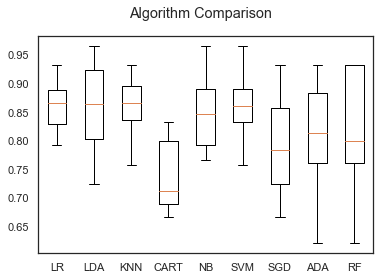

In [842]:
models=train_models(X_scaled,y)

# Model Tuning

In [843]:
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 0, cv=5)

# fitting the model for grid search 
LR_search.fit(X_scaled, y)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)


Mean Accuracy: 0.848
Config: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


# Recursive feature Elimination

In [844]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = LogisticRegression(solver='liblinear', penalty='l1',max_iter=100,C=1,class_weight='balanced')
selector = RFECV(estimator)
selector.fit(X_scaled, y)

RFECV(estimator=LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                   solver='liblinear'))

In [845]:
best_features=np.array(selected_features)[selector.support_]
print(best_features)

['thal_reversable' 'no_vessel' 'st_flat' 'exercize_angina_true'
 'ecg_normal' 'asymptomatic_pain' 'male' 'st_depression'
 'maximum_heart_rate']


In [846]:
X=X[best_features]

In [847]:
from sklearn.preprocessing import MaxAbsScaler

scaler=MaxAbsScaler()
X_scaled=scaler.fit_transform(X)

LR: 0.864483 (0.043945)
LDA: 0.864368 (0.055649)
KNN: 0.837816 (0.049365)
CART: 0.742759 (0.095868)
NB: 0.844253 (0.053201)
SVM: 0.867816 (0.062462)
SGD: 0.796782 (0.082929)
ADA: 0.826897 (0.082325)
RF: 0.810460 (0.075652)


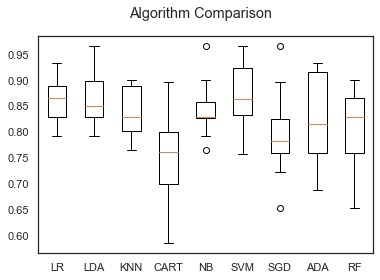

In [848]:
models=train_models(X_scaled,y)

Index(['thal_reversable', 'no_vessel', 'st_flat', 'exercize_angina_true',
       'ecg_normal', 'asymptomatic_pain', 'male', 'st_depression',
       'maximum_heart_rate'],
      dtype='object')


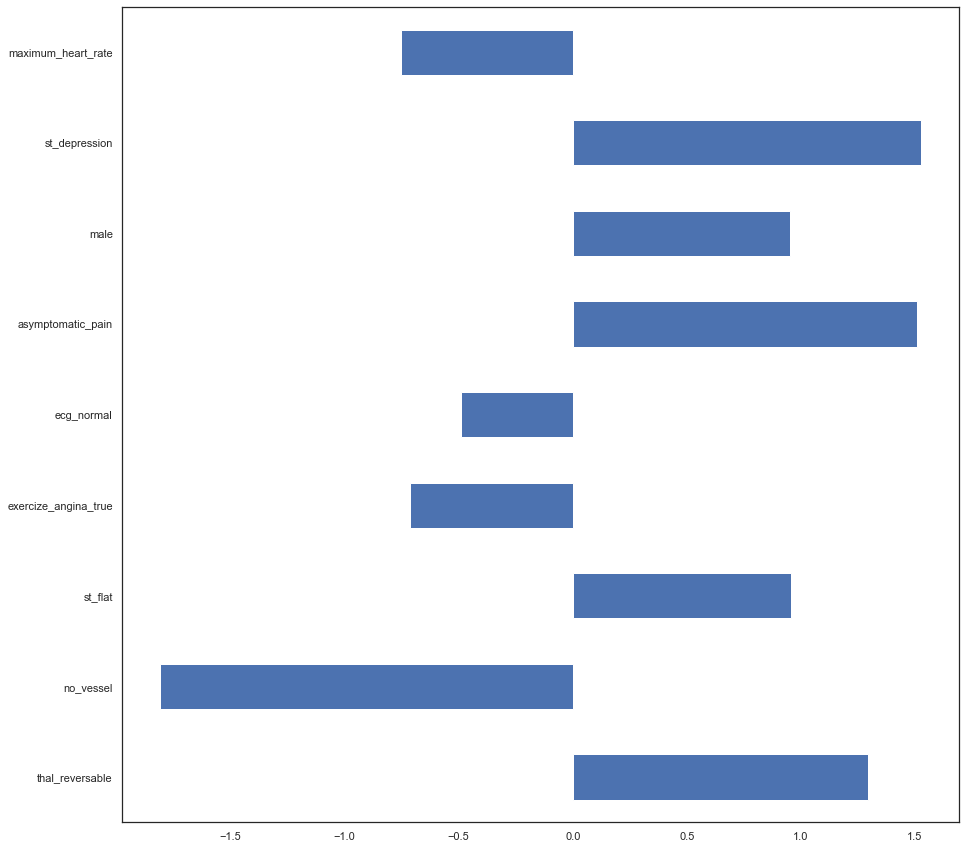

In [849]:
important_features,scores=feature_importance(X_scaled,y,X.columns,0.1)